# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [75]:
# Instalação de bibliotecas básicas
!pip install pandas numpy matplotlib seaborn plotly requests

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from io import BytesIO
from PIL import Image

%matplotlib inline
sns.set(style="darkgrid")


Erro ao carregar a imagem da URL https://logodetimes.com/times/everton/everton-256.png: cannot identify image file <_io.BytesIO object at 0x7cb73220d260>


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [27]:
# Responda aqui a primeira etapa
url = "https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv"

df = pd.read_csv(url)

print("Visualização inicial dos dados:")
print(df.head())

print("\nShape do DataFrame:")
print(df.shape)

print("\nInformações gerais sobre o DataFrame:")
print(df.info())

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

print("\nEstatísticas básicas dos dados numéricos:")
print(df.describe())


Visualização inicial dos dados:
   Unnamed: 0        date   time            comp        round  day venue  \
0           1  2021-08-15  16:30  Premier League  Matchweek 1  Sun  Away   
1           2  2021-08-21  15:00  Premier League  Matchweek 2  Sat  Home   
2           3  2021-08-28  12:30  Premier League  Matchweek 3  Sat  Home   
3           4  2021-09-11  15:00  Premier League  Matchweek 4  Sat  Away   
4           6  2021-09-18  15:00  Premier League  Matchweek 5  Sat  Home   

  result   gf   ga  ...  match report  notes    sh   sot  dist   fk   pk  \
0      L  0.0  1.0  ...  Match Report    NaN  18.0   4.0  16.9  1.0  0.0   
1      W  5.0  0.0  ...  Match Report    NaN  16.0   4.0  17.3  1.0  0.0   
2      W  5.0  0.0  ...  Match Report    NaN  25.0  10.0  14.3  0.0  0.0   
3      W  1.0  0.0  ...  Match Report    NaN  25.0   8.0  14.0  0.0  0.0   
4      D  0.0  0.0  ...  Match Report    NaN  16.0   1.0  15.7  1.0  0.0   

  pkatt season             team  
0   0.0   2022  Manc

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

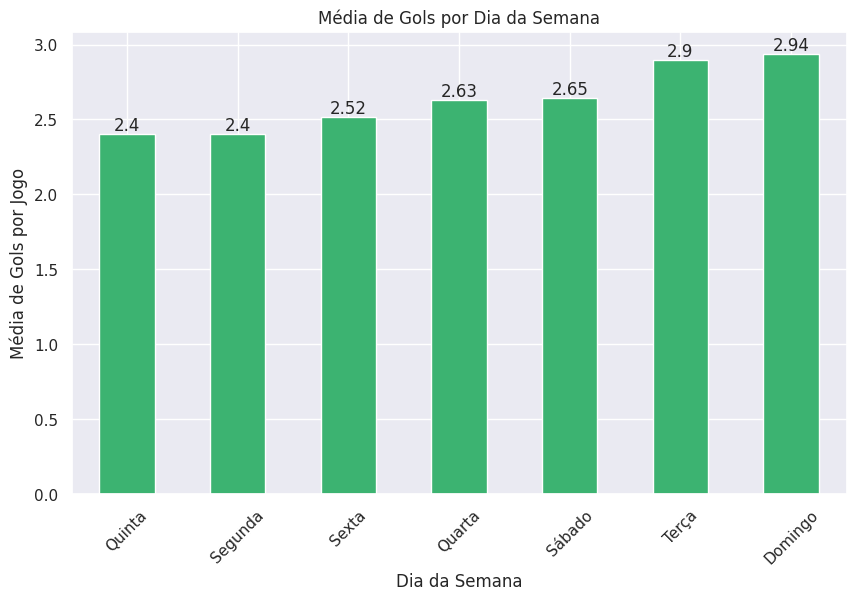

In [53]:
df = pd.read_csv(url)

df['total_goals'] = df['gf'] + df['ga']

dias_semana = {
    'Mon': 'Segunda',
    'Tue': 'Terça',
    'Wed': 'Quarta',
    'Thu': 'Quinta',
    'Fri': 'Sexta',
    'Sat': 'Sábado',
    'Sun': 'Domingo'
}

df['day'] = df['day'].map(dias_semana)

# equaliza a diferença na quantidade de jogos,
# pois é utilizado a média (soma dos gols / quantidade de jogos)
average_goals_by_day = df.groupby('day')['total_goals'].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = average_goals_by_day.plot(kind='bar',color='mediumseagreen')

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), 2),
        ha='center',
        va='bottom'
    )

plt.title('Média de Gols por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols por Jogo')
plt.xticks(rotation=45)
plt.show()

Mesmo equalizado a diferença de jogos entre os dias, pois é dividido o total de gols pelos jogos em cada dia, o que já ajusta para a diferença na quantidade de jogos entre os dias da semana. Podemos notar que Domingo é o dia que mais saem gols.


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

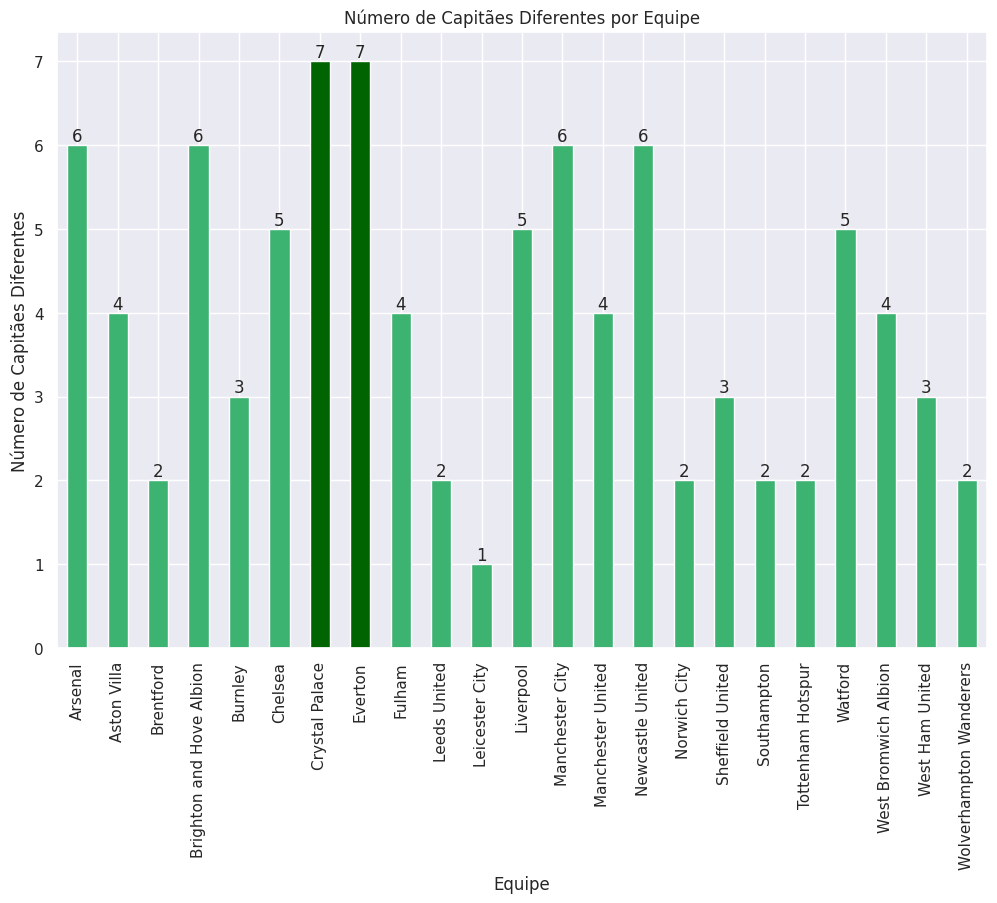

In [56]:
# Responda a etapa aqui
df = pd.read_csv(url)

capitains_per_team = df.groupby('team')['captain'].nunique()

highlight_limit = 6

color_default = 'mediumseagreen'
color_highlight = 'darkgreen'

colors = [color_highlight if count > highlight_limit else color_default for count in capitains_per_team]

plt.figure(figsize=(12, 8))
bars = capitains_per_team.plot(kind='bar', color=colors)

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom'
    )

plt.title('Número de Capitães Diferentes por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Número de Capitães Diferentes')
plt.xticks(rotation=90)
plt.show()


<ipython-input-88-fec6da1dceaf>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(analysis_df['team'], rotation=45, ha='right')


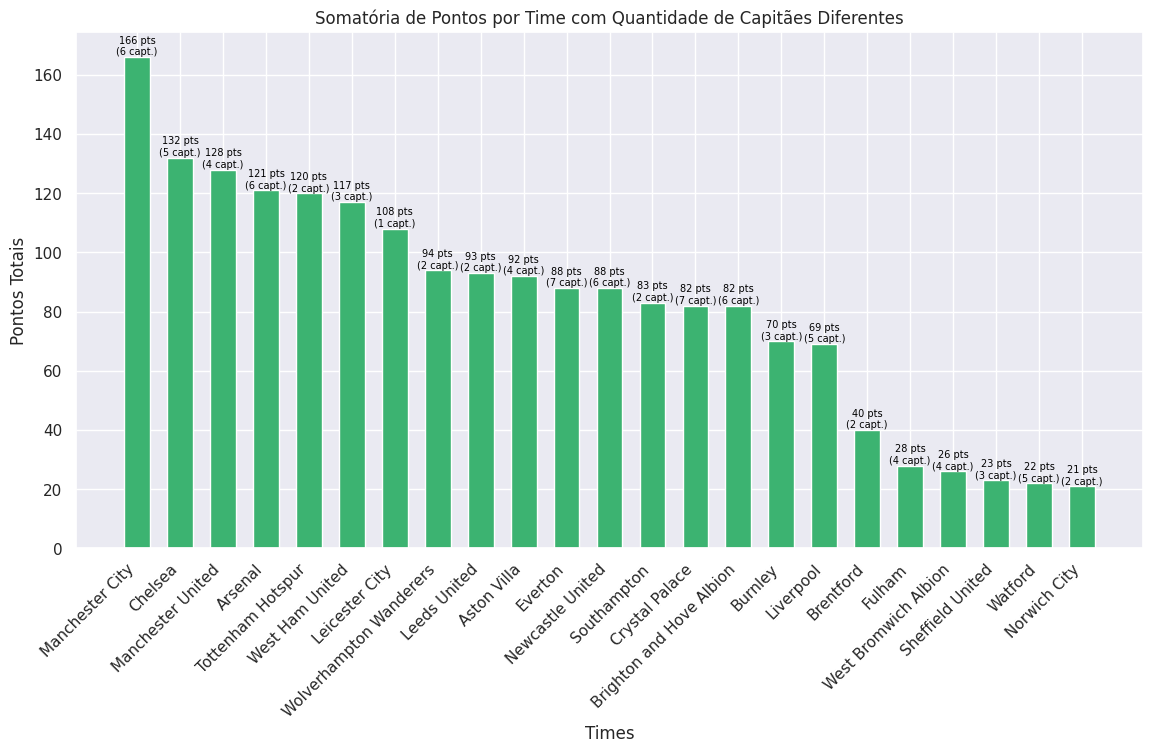

In [88]:
df = pd.read_csv(url)

capitains_count = df.groupby('team')['captain'].nunique()

df['points'] = df['result'].map({'W': 3, 'D': 1, 'L': 0})
points_sum = df.groupby('team')['points'].sum()

analysis_df = pd.DataFrame({
    'Pontos Totais': points_sum,
    'Capitães Diferentes': capitains_count
}).reset_index()

analysis_df = analysis_df.sort_values(by='Pontos Totais', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.6
bars = ax.bar(analysis_df['team'], analysis_df['Pontos Totais'], color='mediumseagreen', width=bar_width)

for bar, points, captains in zip(bars, analysis_df['Pontos Totais'], analysis_df['Capitães Diferentes']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{points} pts\n({captains} capt.)',
            va='bottom', ha='center', color='black', fontsize=7)

ax.set_xlabel('Times')
ax.set_ylabel('Pontos Totais')
ax.set_title('Somatória de Pontos por Time com Quantidade de Capitães Diferentes')
ax.set_xticklabels(analysis_df['team'], rotation=45, ha='right')

plt.tight_layout(pad=2.0)

plt.show()


Com o gráfico acima temos uma relação da somatória de pontos dos times juntamente com a quantidade de vezes que trocou de capitão durante a temporada. Não há como definir uma relação clara entre esses dois dados porém há uma certa tendência para equipes que trocam de capitão mais vezes somarem mais pontos.

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

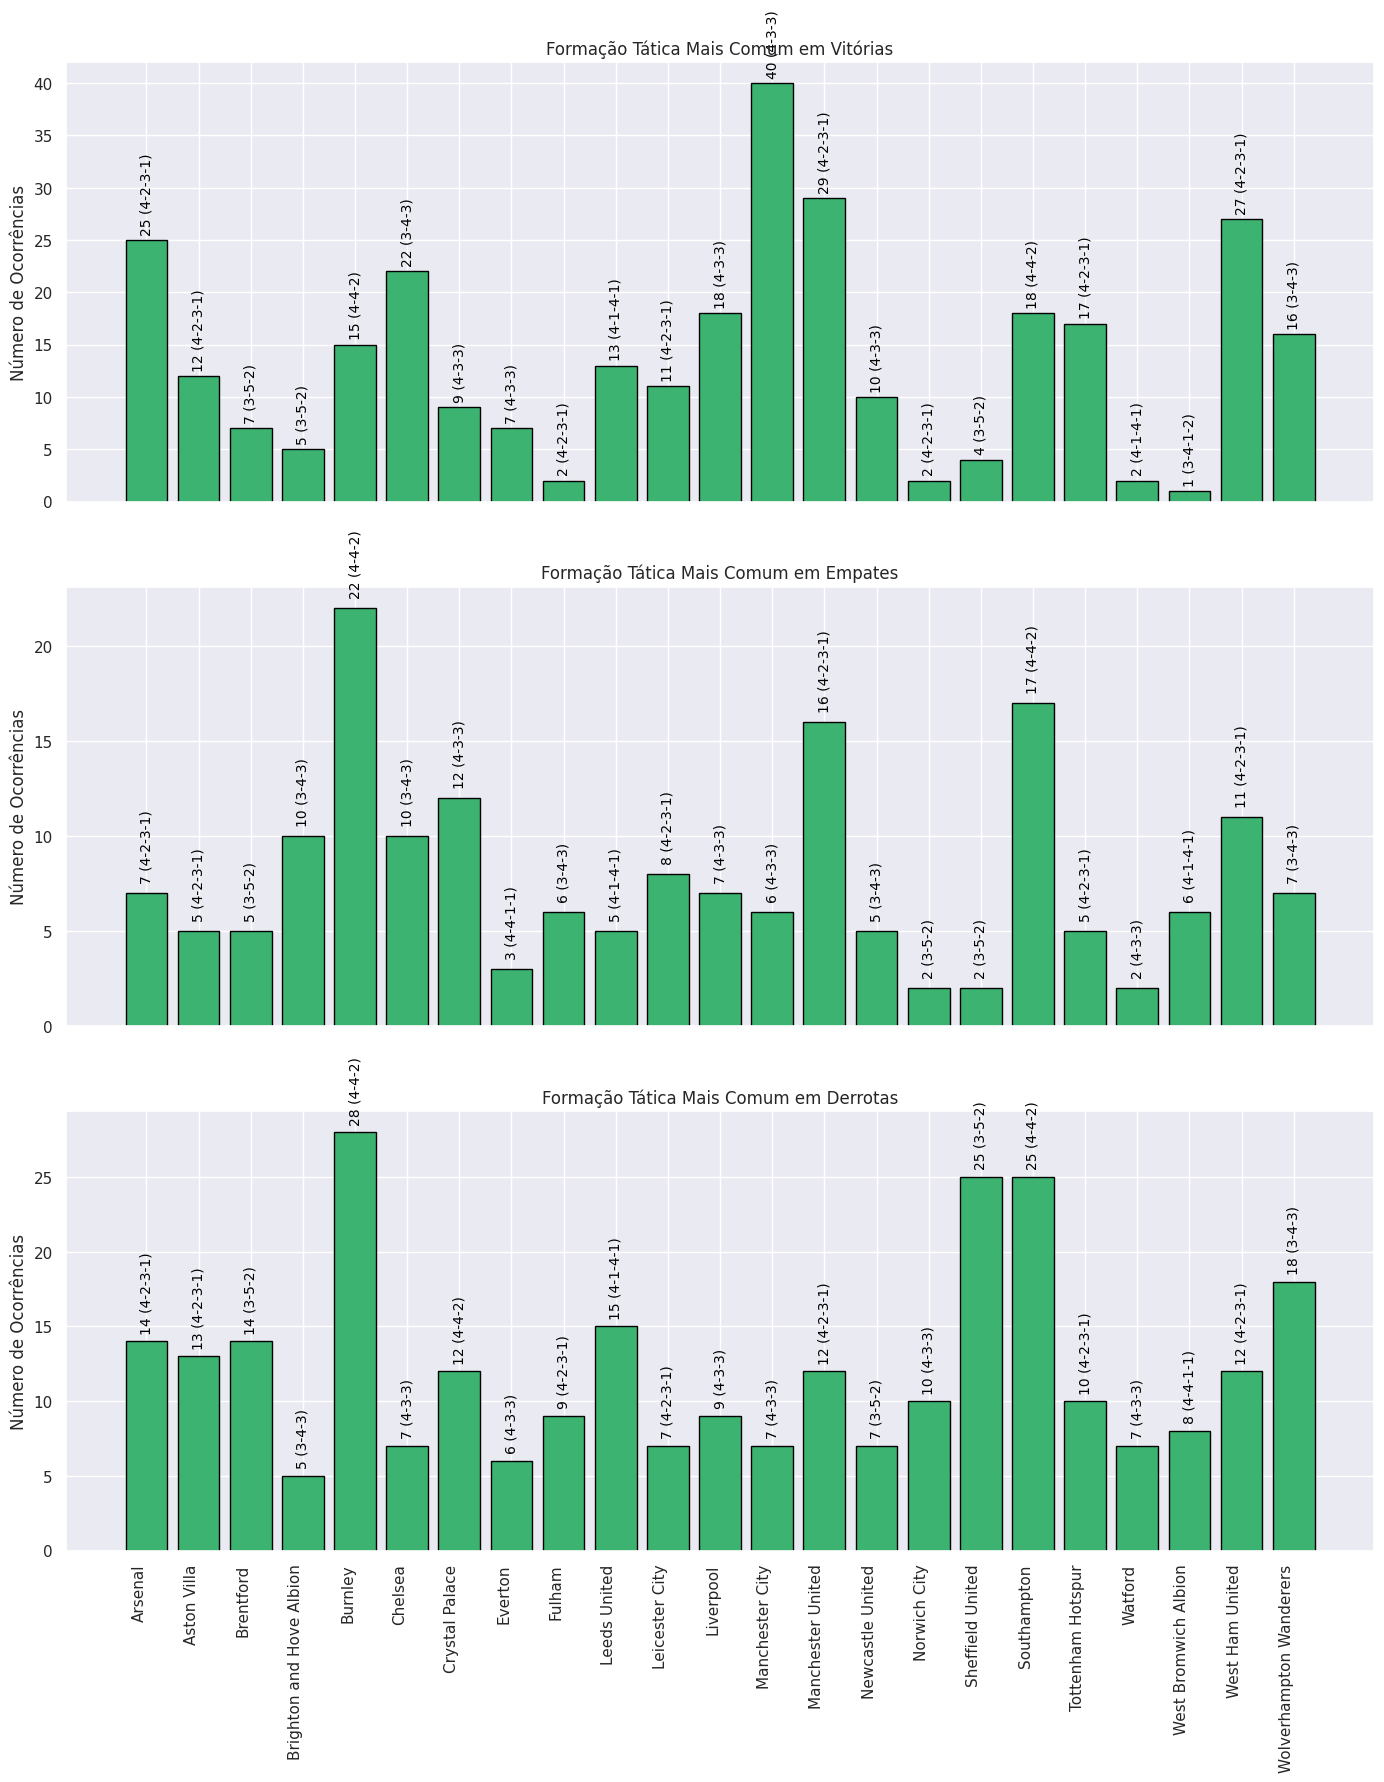

Formação Tática mais Comum em Empates:
Formação: 4-2-3-1
Número de Ocorrências: 81

Formação Tática mais Comum em Derrotas:
Formação: 4-2-3-1
Número de Ocorrências: 110

Formação Tática mais Comum em Vitórias:
Formação: 4-2-3-1
Número de Ocorrências: 153


In [98]:
df = pd.read_csv(url)

df['formation'] = df['formation'].fillna('Desconhecida')

def most_common_formation(df, result_type):
    df_result = df[df['result'] == result_type]
    formation_counts = df_result.groupby(['team', 'formation']).size().reset_index(name='count')
    most_common_formations = formation_counts.loc[formation_counts.groupby('team')['count'].idxmax()]
    return most_common_formations


most_common_victories = most_common_formation(df, 'W')
most_common_draws = most_common_formation(df, 'D')
most_common_losses = most_common_formation(df, 'L')

fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

def plot_formations(ax, data, title):
    teams = data['team']
    formations = data['formation']
    counts = data['count']

    bars = ax.bar(teams, counts, color='mediumseagreen', edgecolor='black')

    for bar, formation, count in zip(bars, formations, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{count} ({formation})',
                ha='center', va='bottom', fontsize=10, color='black', rotation=90)

    ax.set_ylabel('Número de Ocorrências')
    ax.set_title(title)
    ax.set_xticks(teams)
    ax.set_xticklabels(teams, rotation=90, ha='right')

plot_formations(axs[0], most_common_victories, 'Formação Tática Mais Comum em Vitórias')
plot_formations(axs[1], most_common_draws, 'Formação Tática Mais Comum em Empates')
plot_formations(axs[2], most_common_losses, 'Formação Tática Mais Comum em Derrotas')

plt.tight_layout()
plt.show()


def most_common_formation(df, result_type):
    df_result = df[df['result'] == result_type]
    formation_counts = df_result['formation'].value_counts()
    most_common = formation_counts.idxmax()
    count = formation_counts.max()
    return most_common, count

most_common_draws, count_draws = most_common_formation(df, 'D')
most_common_losses, count_losses = most_common_formation(df, 'L')
most_common_victories, count_victories = most_common_formation(df, 'W')

print("Formação Tática mais Comum em Empates:")
print(f"Formação: {most_common_draws}")
print(f"Número de Ocorrências: {count_draws}\n")

print("Formação Tática mais Comum em Derrotas:")
print(f"Formação: {most_common_losses}")
print(f"Número de Ocorrências: {count_losses}\n")

print("Formação Tática mais Comum em Vitórias:")
print(f"Formação: {most_common_victories}")
print(f"Número de Ocorrências: {count_victories}")




Com a análise acima podemos comprar entre as equipes as formações pelas suas respectivas quantidades de vitória, empate e derrota e também é possível identificar a formação mais comum no geral para todos esses três, sendo a formação '4-2-3-1' a mais utilizada em toda a temporada.

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

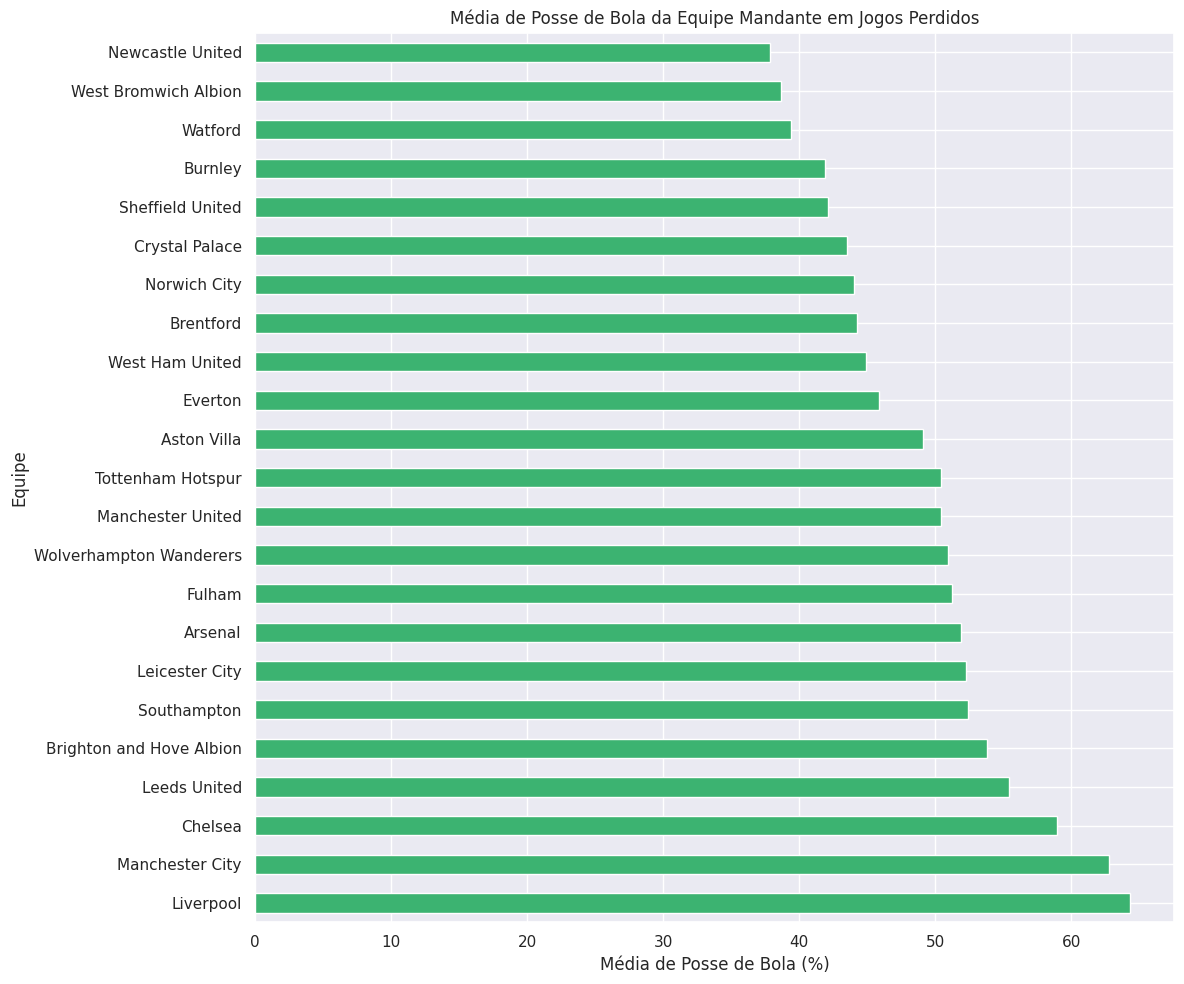

In [100]:
df = pd.read_csv(url)

df['poss'] = df['poss'].fillna(0)

df_losses = df[(df['result'] == 'L')]

mean_possession_by_team = df_losses.groupby('team')['poss'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
mean_possession_by_team.plot(kind='barh', color='mediumseagreen')

plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos')
plt.xlabel('Média de Posse de Bola (%)')
plt.ylabel('Equipe')
plt.tight_layout()

plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

Erro ao carregar imagem: Invalid URL '': No scheme supplied. Perhaps you meant https://?


Posição,Equipe,Pontos,Brasão
1,Manchester City,166,
2,Chelsea,132,
3,Manchester United,128,
4,Arsenal,121,
5,Tottenham Hotspur,120,
6,West Ham United,117,
7,Leicester City,108,
8,Wolverhampton Wanderers,94,
9,Leeds United,93,
10,Aston Villa,92,

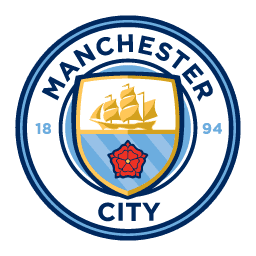
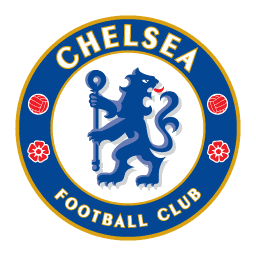
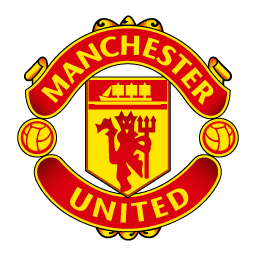
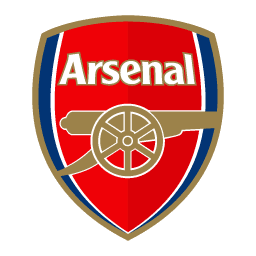
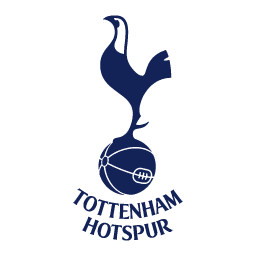
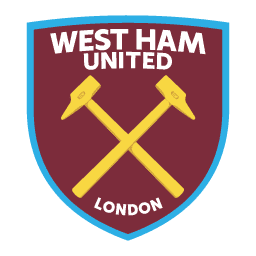
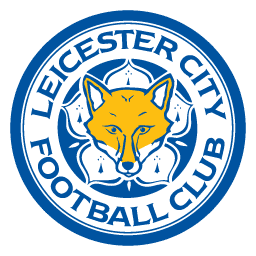
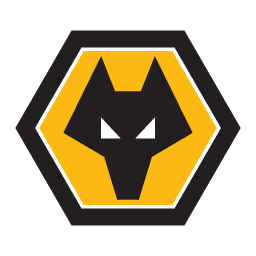
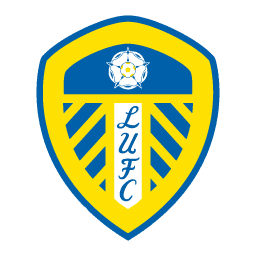
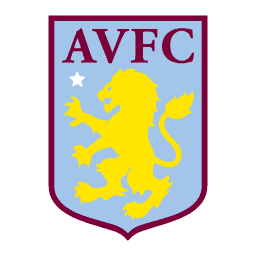
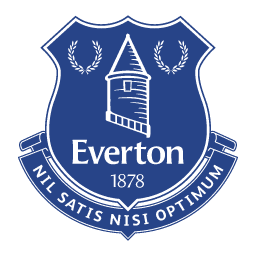
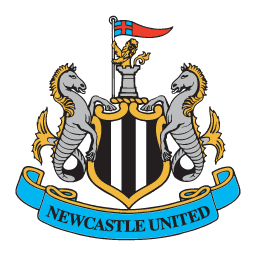
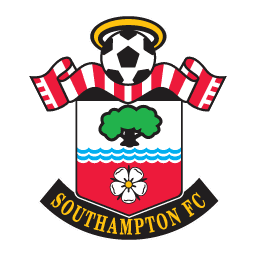
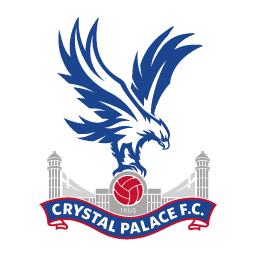
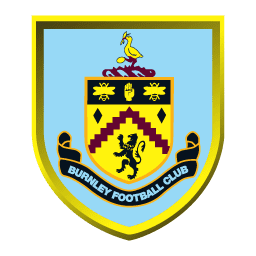
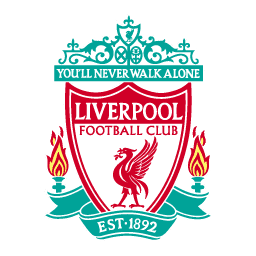
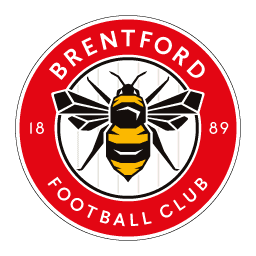
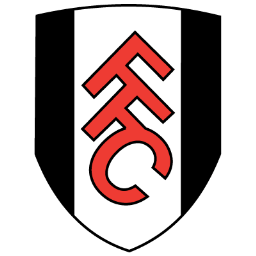
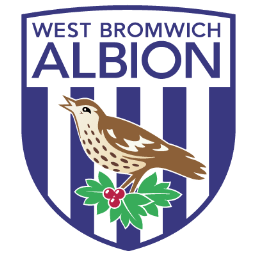
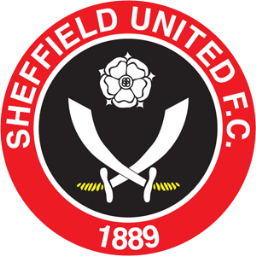
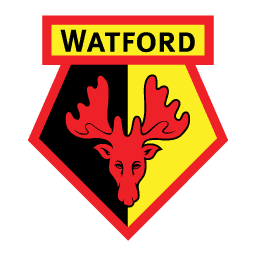
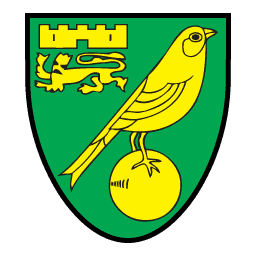

In [109]:
def load_image_from_url(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Erro ao carregar imagem: {e}")
        return None

def get_logo_url(team_name):
    logo_urls = {
      'Manchester City': 'https://logodetimes.com/times/manchester-city-football-club/manchester-city-football-club-256.png',
      'Liverpool': 'https://logodetimes.com/times/liverpool-football-club/liverpool-football-club-256.png',
      'Chelsea': 'https://logodetimes.com/times/chelsea-football-club/chelsea-football-club-256.png',
      'Manchester United': 'https://logodetimes.com/times/manchester-united-football-club/manchester-united-football-club-256.png',
      'Everton': 'https://logodetimes.com/times/everton-football-club/everton-football-club-256.png',
      'Leicester City': 'https://logodetimes.com/times/leicester-city-football-club/leicester-city-football-club-256.png',
      'Arsenal': 'https://logodetimes.com/times/arsenal-football-club/arsenal-football-club-256.png',
      'Tottenham Hotspur': 'https://logodetimes.com/times/tottenham-hotspur-football-club/tottenham-hotspur-football-club-256.png',
      'West Ham United': 'https://logodetimes.com/times/west-ham-united-football-club/west-ham-united-football-club-256.png',
      'Wolverhampton Wanderers': 'https://logodetimes.com/times/wolverhampton-wanderers-football-club/wolverhampton-wanderers-football-club-256.png',
      'Aston Villa': 'https://logodetimes.com/times/aston-villa-football-club/aston-villa-football-club-256.png',
      'Newcastle United': 'https://logodetimes.com/times/newcastle-united-football-club/newcastle-united-football-club-256.png',
      'Brighton and Hove Albion	': 'https://logodetimes.com/times/brighton-hove-albion-football-club/brighton-hove-albion-football-club-256.png',
      'Crystal Palace': 'https://logodetimes.com/times/crystal-palace-football-club/crystal-palace-football-club-256.png',
      'Burnley': 'https://logodetimes.com/times/burnley-football-club/burnley-football-club-256.png',
      'Sheffield United': 'https://logodetimes.com/times/sheffield-united-football-club/sheffield-united-football-club-256.png',
      'Fulham': 'https://logodetimes.com/times/fulham-football-club/fulham-football-club-256.png',
      'West Bromwich Albion': 'https://icons.iconarchive.com/icons/giannis-zographos/english-football-club/256/West-Bromwich-Albion-icon.png',
      'Leeds United': 'https://logodetimes.com/times/leeds-united-football-club/leeds-united-football-club-256.png',
      'Southampton': 'https://logodetimes.com/times/southampton-football-club/southampton-football-club-256.png',
      'Nottingham Forest': 'https://logodetimes.com/times/nottingham-forest-football-club/nottingham-forest-football-club-256.png',
      'Brentford': 'https://logodetimes.com/times/brentford-football-club/brentford-football-club-256.png',
      'Fulham': 'https://icons.iconarchive.com/icons/giannis-zographos/english-football-club/256/Fulham-FC-icon.png',
      'Sheffield United': 'https://icons.iconarchive.com/icons/giannis-zographos/english-football-club/256/Sheffield-United-icon.png',
      'Watford': 'https://logodetimes.com/times/watford-football-club/watford-football-club-256.png',
      'Norwich City': 'https://logodetimes.com/times/norwich-city-football-club/norwich-city-football-club-256.png'
}

    return logo_urls.get(team_name, '')

url = 'https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv'
df = pd.read_csv(url)

df['points'] = df['result'].map({'W': 3, 'D': 1, 'L': 0})
team_points = df.groupby('team')['points'].sum().reset_index()
team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)
team_points.index += 1

table_html = '<table border="1"><tr><th>Posição</th><th>Equipe</th><th>Pontos</th><th>Brasão</th></tr>'
for _, row in team_points.iterrows():
    team_name = row['team']
    points = row['points']
    logo_url = get_logo_url(team_name)
    logo_img = load_image_from_url(logo_url)

    if logo_img:
        img = BytesIO()
        logo_img.save(img, format='PNG')
        img.seek(0)
        img_base64 = base64.b64encode(img.getvalue()).decode('utf-8')
        img_tag = f'<img src="data:image/png;base64,{img_base64}" width="50" height="50">'
    else:
        img_tag = ''

    table_html += f'<tr><td>{row.name}</td><td>{team_name}</td><td>{points}</td><td>{img_tag}</td></tr>'
table_html += '</table>'

display(HTML(table_html))


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [132]:
data = requests.get(url).text
df = pd.read_csv(StringIO(data))

df['date'] = pd.to_datetime(df['date'])
df_filtered = df[df['date'] >= '2021-08-01']

total_publico = df_filtered.groupby('team')['attendance'].sum().reset_index()

fig = px.bar(total_publico, x='team', y='attendance', title='Público Total por Equipe (Desde Agosto de 2021)',
             labels={'attendance': 'Público Total'}, color='attendance',
             color_continuous_scale='Cividis')

df_drilldown = df_filtered[['team', 'attendance', 'date', 'venue', 'opponent']]

fig.update_traces(
    hovertemplate='<br>'.join([
        'Equipe: %{x}',
        'Público Total: %{y}',
        'Data: %{customdata[0]}',
    ]),
    customdata=df_drilldown[['date', 'attendance', 'venue', 'opponent']].values
)

fig.update_layout(
    xaxis_title='Equipe',
    yaxis_title='Público Total',
    xaxis_tickangle=-45
)

fig.show()

def plot_drilldown_for_all_teams(df):
    teams = df['team'].unique()
    for team_name in teams:
        df_team = df[df['team'] == team_name]
        fig_drilldown = px.bar(df_team, x='date', y='attendance', title=f'Público por Jogos - {team_name} (Desde Agosto de 2021)',
                              labels={'attendance': 'Público'}, color='attendance',
                              color_continuous_scale='Cividis')
        fig_drilldown.update_traces(
            hovertemplate='<br>'.join([
                'Data: %{x}',
                'Público: %{y}',
                'Adversário: %{customdata[0]}',
                'Local: %{customdata[1]}',
            ]),
            customdata=df_team[['opponent', 'venue']].values
        )
        fig_drilldown.update_layout(
            xaxis_title='Data do Jogo',
            yaxis_title='Público',
            xaxis_tickangle=-45
        )
        fig_drilldown.show()

plot_drilldown_for_all_teams(df_filtered)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

